<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [ ]:
import tensorflow as tf

In [ ]:
rank_0 =tf.constant(99.99)
print(rank_0)
print(type(rank_0))

tf.Tensor(99.99, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [ ]:
rank_1 = tf.constant([9,8,7,6,5])
print(rank_1)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [ ]:
print(tf.add(7,rank_1))

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


In [ ]:
print(rank_1+7)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [ ]:
rank_2 = tf.constant([[1, 2, 3], [ 4,5,6]])
print(rank_2)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [ ]:
tf.transpose(rank_2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [ ]:
tf.reshape(rank_2,[3,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
tf.reshape(rank_2,[-1,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
tf.reshape(rank_2,[3,-1])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [ ]:
print('Dtype',rank_2.dtype)
print('Number of Axes:',rank_2.ndim)
print('Shape:',rank_2.shape)

Dtype <dtype: 'int32'>
Number of Axes: 2
Shape: (2, 3)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1

### Load the data
- Load the data, check the shape of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_data-1.csv')

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns')

There are  8128 rows and  11 columns


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [ ]:
def map_num(num):
  try:
    if type(num)== str:
       return float(num.split()[0])
    else:
       return num
  except:
       return np.nan

In [ ]:
df[['mileage','engine','max_power']] =  df[['mileage','engine','max_power']].applymap(map_num)

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
o = {'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner']=df['owner'].map(o)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,dtype=np.int64)
cat_col = ['fuel','seller_type','transmission']
z = ohe.fit_transform(df[cat_col])
encoded_data = pd.DataFrame(z,columns=ohe.get_feature_names(cat_col))
encoded_data.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1


In [ ]:
df1=df.drop(columns=cat_col,axis=1)
final_df = pd.concat([df1,encoded_data],axis=1)
final_df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


In [ ]:
final_df.isnull().sum()

year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       216
seats                           221
fuel_CNG                          0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Dealer                0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Automatic            0
transmission_Manual               0
dtype: int64

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df.shape

(7906, 17)

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [ ]:
from sklearn.model_selection import train_test_split
x = final_df.drop('selling_price',axis=1)
y = final_df['selling_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5929, 16), (1977, 16), (5929,), (1977,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
x_train_sc.shape

(5929, 16)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Input,BatchNormalization
from keras.utils.vis_utils import plot_model

### Check model summary and visualize the model

In [ ]:
model =Sequential()
model.add(tf.keras.Input(shape=(16)))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

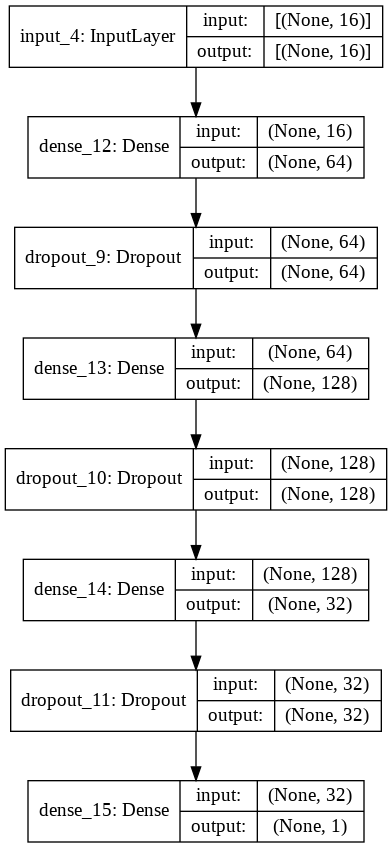

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
from keras import backend as K
def r_2_score(y_true,y_pred):
  SS_resid = K.sum(K.square(y_true-y_pred))
  SS_total   = K.sum(K.square(y_true - K.mean(y_true)))
  return (1- SS_resid/(SS_total +K.epsilon()))

In [ ]:
from sklearn.metrics import r2_score
model.compile(loss='mean_absolute_error',optimizer='adam',metrics = [r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 200
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')

In [ ]:
history = model.fit(x_train_sc,y_train,batch_size=32,epochs=200,verbose=1,validation_data=(x_test_sc,y_test),callbacks=callback)

Epoch 1/200
186/186 [==============================] - 4s 6ms/step - loss: 666479.8951 - r_2_score: -1.2062 - val_loss: 649514.6250 - val_r_2_score: -1.0168
Epoch 2/200
186/186 [==============================] - 1s 4ms/step - loss: 636503.9973 - r_2_score: -1.1948 - val_loss: 546894.8750 - val_r_2_score: -0.6447
Epoch 3/200
186/186 [==============================] - 1s 4ms/step - loss: 487895.1758 - r_2_score: -0.5252 - val_loss: 323812.6250 - val_r_2_score: 0.2136
Epoch 4/200
186/186 [==============================] - 1s 4ms/step - loss: 295138.4148 - r_2_score: 0.3206 - val_loss: 253610.4688 - val_r_2_score: 0.5215
Epoch 5/200
186/186 [==============================] - 1s 4ms/step - loss: 239482.8461 - r_2_score: 0.5416 - val_loss: 226164.7812 - val_r_2_score: 0.6114
Epoch 6/200
186/186 [==============================] - 1s 4ms/step - loss: 209836.7108 - r_2_score: 0.6166 - val_loss: 210346.4688 - val_r_2_score: 0.6603
Epoch 7/200
186/186 [==============================] - 1s 4ms/ste

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [ ]:
model.evaluate(x_test_sc,y_test,batch_size=64)

31/31 [==============================] - 0s 2ms/step - loss: 120767.8281 - r_2_score: 0.9102


[120767.828125, 0.9102146029472351]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [ ]:
y_pred=model.predict(x_test_sc)
print(r2_score(y_test,y_pred))

0.9156710726846564


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

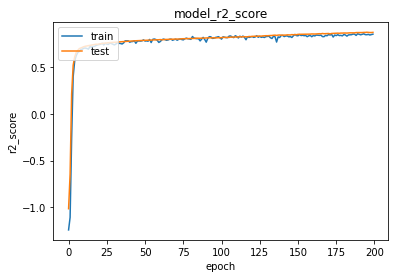

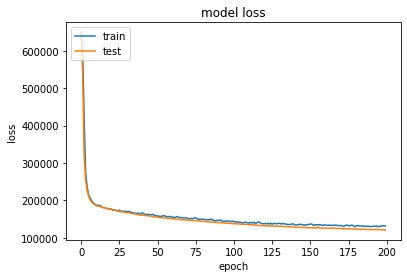

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['r_2_score'])  
plt.plot(history.history['val_r_2_score'])  
plt.title('model_r2_score')  
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
model_leaky =Sequential()
model_leaky.add(tf.keras.layers.BatchNormalization())

model_leaky.add(tf.keras.Input(shape=(16)))


model_leaky.add(Dense(64))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model_leaky.add(Dropout(0.15))

model_leaky.add(Dense(128))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model_leaky.add(Dropout(0.10))

model_leaky.add(Dense(32))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model_leaky.add(Dropout(0.05))

model_leaky.add(Dense(1,activation='linear'))

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
model_leaky.compile(loss='mean_absolute_error',optimizer='adam',metrics = [r_2_score])

### Train your model

- epochs: 200
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
history_1 = model_leaky.fit(x_train_sc,y_train,batch_size=16,epochs=200,verbose=1,
                    validation_data=(x_test_sc,y_test),callbacks=[callback_1,check_point])

Epoch 1/200
371/371 [==============================] - 2s 5ms/step - loss: 618408.9991 - r_2_score: -1.9877 - val_loss: 476997.0938 - val_r_2_score: -0.7341
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/200
371/371 [==============================] - 2s 4ms/step - loss: 422888.1314 - r_2_score: -0.5299 - val_loss: 382239.5625 - val_r_2_score: -0.1512
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 3/200
371/371 [==============================] - 2s 4ms/step - loss: 337276.3150 - r_2_score: 0.0227 - val_loss: 294368.5938 - val_r_2_score: 0.2841
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 4/200
371/371 [==============================] - 2s 4ms/step - loss: 283418.2384 - r_2_score: 0.3671 - val_loss: 255769.5000 - val_r_2_score: 0.4485
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 5/200
371/371 [==============================] - 2s 4ms/step - loss: 262158.2428 - r_2_score: 0.3775 - val_loss: 237904.7500 - val_r_2_score: 0.5277
I

### Check the R2 score on complete test data

In [ ]:
y_pred=model_leaky.predict(x_test_sc)
print(r2_score(y_test,y_pred))

0.8992033018843616


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

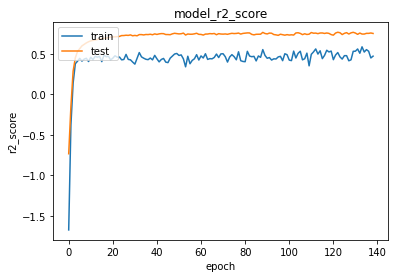

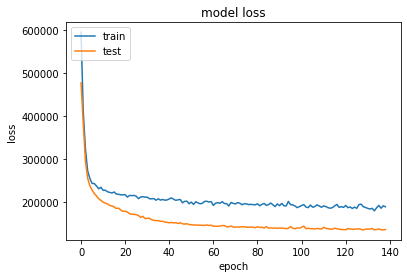

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['r_2_score'])  
plt.plot(history_1.history['val_r_2_score'])  
plt.title('model_r2_score')  
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [97]:
from tensorflow.keras import initializers

model_2 =Sequential()
model_2.add(tf.keras.Input(shape=(16)))


he_initializer = tf.keras.initializers.HeUniform(seed=7)

model_2.add(Dense(256,activation='relu',kernel_initializer=he_initializer))
model_2.add(Dropout(0.15))

model_2.add(Dense(128,activation='relu',kernel_initializer=he_initializer))
model_2.add(Dropout(0.10))

model_2.add(Dense(64,activation='relu',kernel_initializer=he_initializer))
model_2.add(Dropout(0.07))

model_2.add(Dense(32,activation='relu',kernel_initializer=he_initializer))
model_2.add(Dropout(0.05))

model_2.add(Dense(1,activation='linear'))

### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [99]:
model_2.compile(loss='mean_absolute_error',optimizer='adam',metrics = [r_2_score])

### Train your model

- epochs: 100
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [103]:
callback_3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
history_3 = model_2.fit(x_train_sc,y_train,batch_size=64,epochs=100,verbose=1,validation_data=(x_test_sc,y_test),callbacks=callback_3)

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 645192.0312 - r_2_score: -0.8747 - val_loss: 638643.6875 - val_r_2_score: -0.7281
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 586271.0146 - r_2_score: -0.6248 - val_loss: 329529.7500 - val_r_2_score: 0.2718
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 303562.0861 - r_2_score: 0.3906 - val_loss: 241489.6562 - val_r_2_score: 0.5791
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 234221.9328 - r_2_score: 0.5817 - val_loss: 210099.8125 - val_r_2_score: 0.6663
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 203359.6948 - r_2_score: 0.6557 - val_loss: 194593.4844 - val_r_2_score: 0.7117
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 197185.6408 - r_2_score: 0.7018 - val_loss: 187084.8594 - val_r_2_score: 0.7296
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 177022

### Check the R2 score on complete test data

In [104]:
y_pred=model_2.predict(x_test_sc)
print(r2_score(y_test,y_pred))

0.9429299187586333


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

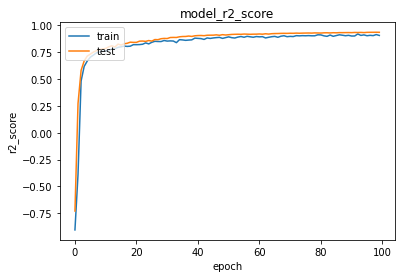

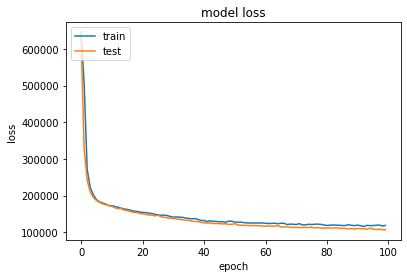

In [105]:
plt.plot(history_3.history['r_2_score'])  
plt.plot(history_3.history['val_r_2_score'])  
plt.title('model_r2_score')  
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(history_3.history['loss'])  
plt.plot(history_3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()